In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.collocations import BigramCollocationFinder,TrigramCollocationFinder
from nltk import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
import csv
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import regex as re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as sia
nltk.download('maxent_ne_chunker')
nltk.download('words')
pd.set_option('max_rows',None)
pd.set_option('max_columns', None)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Ish\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Ish\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
# load resources
steamtop = pickle.load(open('steam_backup_top_350.p','rb'))
steammid = pickle.load(open('steam_back_up_middle_350.p','rb'))
steambottom = pickle.load(open('steam_back_up_bottom_350.p','rb'))
steamfull = pickle.load(open('steam_data_plan_b_clean.p', 'rb'))


In [3]:

# steam reviews from pickled lists
steamtop['reviews'] = pickle.load(open('steam_top_380.p','rb'))
steammid['reviews'] = pickle.load(open('steam_mid_380s_reviews.p','rb'))
steambottom['reviews'] = pickle.load(open('steam_bottom_380.p','rb'))



In [4]:
steamtop['reviews'][:20]

6346     [Amazing RPG. Great story, characters and dial...
1186     [It's Skyrim.  I don't need to say anything el...
1858     [This is a positive review of this company's g...
8625     [As most people know by now... This game is am...
3361     [nice game, you need try it, but it is always ...
154      [I have had tons of fun on this game already a...
227      [Best Call of Duty game ever made, Promod was ...
14244    [This game is quite easy, but don't let this s...
7060     [One of the, if not the best game of the 2010s...
2030     [when the game is good, I NEED TO RESEARCH, WH...
559                                                     []
472      [Pros:\nHistoria\nDecisiones\nTácticas\nCons:\...
1446     [an extremely fun game to play, especially whe...
184      [Nothing against the game I think it's just no...
1628     [First game I ever bought :,)\nAlso pretty goo...
2026     [dont you just love it when you kill hundreds ...
1995     [Well, if you can't get Scholar of the First S.

In [5]:
# create new dataframes for NLP.
steam_t = steamtop[['steam_appid', 'name', 'metacritic', 'reviews']]

steam_m = steammid[['steam_appid', 'name', 'metacritic', 'reviews']]

steam_b = steambottom[['steam_appid', 'name', 'metacritic', 'reviews']]

# create a list for convenient iteration through the rows
steam_team = [steam_t, steam_m, steam_b]




In [6]:
#remove NaN values from all frames
for x in steam_team:
    x.dropna(inplace = True)
    x.reset_index(inplace = True)


C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [7]:
# create a column to track the average review length for each game
# define function to count words in each review in a list of reviews and return the average length of a review.
def review_wordcount(reviewlist):
    wordcount = []
    for l in reviewlist:
        try:
            l = l.split(' ')
            wordcount.append(len(l))
            
        except:
            wordcount.append(0)
    mean_length = np.round(np.mean(wordcount))
    return mean_length



In [8]:
# process reviews for analysis.
# Create a column to keep track of the number of reviews for each game.
for df in steam_team:
    review_counts = []
    for x in range(len((df['reviews']))):
        try: 
            review_counts.append(len(df['reviews'][x]))
        except:
            review_counts.append(np.NaN)
    df['review_counts'] = review_counts

for df in steam_team:
    df.sort_values(by ='review_counts', ascending = False)


C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [9]:
def review_lengths(review_list):
    review_lens = []
    for x in range(len(review_list)):
        try:
            length = len(review_list[x].split(' '))
            review_dict = {f'{x} review':length}
        except:
            review_dict = {f'{x} review':0}
        review_lens.append(review_dict)
    return review_lens

for df in steam_team:
    df['review_lengths'] = df['reviews'].apply(lambda x: review_lengths(x))


# create a complete dataframe of the separated dataframes.
steam_total_reviews = pd.concat(steam_team)


In [10]:
# define a function to consolidate the list of reviews into a single body of text.
def review_unify(reviewlist):
    review_stew = ' '.join(reviewlist)
    return review_stew

# TEST: review_unify(rawg_reviews_top_200['reviews'][0])
steam_total_reviews['review_string'] = steam_total_reviews['reviews'].apply(lambda x: review_unify(x))

# create review stew columns for each dataframe
#convert lists of strings to full body strings.

for df in steam_team:
    df['review_string'] = df['reviews'].apply(lambda x: review_unify(x))

In [11]:
steam_m.review_string[0]

'gameplay is clunky but that raises the tension. Obsolete now, get the game of the year edition,  or State of Decay 2 One of the best comunity manager/zombie games I play My personal favourite when it comes to zombie survival sandbox game. You can build and manage your base, setting up outposts in the perimeter to scout for dangers ahead and also watch for hordes that are incoming towards your base. The main dish of this game is to find for resources and stockpile them to your base so that you can build facilities as well as make some other improvements. Craft weapons and weapon attachments so that your arsenal inventory will not break or blunt when used often.\n\nBring a party of two, three or four at max for a supply run, scouting and salvaging for materials, food, items as well resources for your characters and your base. This is the vanilla version of the game, where weapons are basic but packs a punch when you have the right ammo in your inventory as well as luck when it comes to 

In [12]:
# define functions for cleaning and preparing text data for analysis.
# preliminary cleaning
def clean_up(string):
    # sort through input and remove any patterns that look like urls.
    import regex as re
    # use regex to identify and drop URL strings.
    url_to_drop = re.findall('(?:(?:https?|ftp):\/\/)?[\w/\-?=%.]+\.[\w/\-&?=%.]+', string)
    html_tag_to_drop = re.findall('\W+\w*\W+', string)
    try:
        string = string.replace(url_to_drop[0], " ")
    except:
        string=string
    # use regex to identify non-functional special characters
    chars_to_drop = re.findall('\W',string)
    for x in range(len(chars_to_drop)):
        string = string.replace(chars_to_drop[x],' ')
    # use regex to identify numerical values to drop.
    nums_to_drop = re.findall('\S?[0-9]', string)
    for n in range(len(nums_to_drop)):
        string = string.replace(nums_to_drop[n], ' ')
    # convert all remaining items to lower case
    return string.lower()

# tokenizing the cleaned text data
import nltk
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')

def tokenize(string):
    s_tokenized = nltk.word_tokenize(string)
    return s_tokenized

# produce stemmed and lemmatized results of the text input
def get_pos(tokenlist):
    pos_list = []
    for x in tokenlist:
        tag = nltk.pos_tag([x])[0][1][0].upper() # gets first letter of POS categorization
        tag_dict = {"J": wordnet.ADJ, 
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN) # get returns second argument if first key does not exist 

import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet
def stem_and_lemmatize(l):
    p_stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    l_stemmed = [p_stemmer.stem(l[x]) for x in range(len(l))]
    l_lemmatized = []
    for x in l:
        try:    
            l_lemmatized.append(lemmatizer.lemmatize(x, pos = (get_pos(x))))
        except:
            pass     
    return l_lemmatized

# remove stopwords from text sample.
from nltk.corpus import stopwords
nltk.download('stopwords')
def remove_stopwords(l):
    l_stopped = [word for word in l if not word in stopwords.words('english')]
    l_stopped = [word for word in l_stopped if word not in ['game','play','s', 'wa', 'good', 'like', 'lol','rofl', 'ha', 'nan'] ]
    return l_stopped

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# define a function to clean text bodies for each row and output a list of lemmatized words.
def nlp_processing(x):
    cleaned = clean_up(x)
    tokenized = tokenize(cleaned)
    stemmd_n_lemmd = stem_and_lemmatize(tokenized)
    processed_ = remove_stopwords(stemmd_n_lemmd)      
    return processed_


In [14]:
for df in steam_team:
    df['cleaned_reviews'] =df['review_string'].apply(lambda x: nlp_processing(x)) 

In [15]:
# Determine average sentiment of reviews for each game using textblob
from textblob import TextBlob
# define a function to get the average textblob sentiment score of a list of texts.
def Sentimental_blob(textlist):
    blob_sents = []
    for blob in textlist:
        tb = TextBlob(blob)
        sentiment = tb.sentiment
        blob_sents.append(sentiment)
    avg_sentiment = np.mean(blob_sents)
    return avg_sentiment

for df in steam_team:
    df['avg. review sentiment'] = df['cleaned_reviews'].apply(lambda x : Sentimental_blob(x))


C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [16]:
# determine average sentiment of reviews for each game using vader Sentimental Text Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as sia
# define a function to get the average textblob sentiment score of a list of texts.
def darth_sentiments(textlist, label):
    s_i_a = sia()
    sentiment_scores = []
    for text in textlist:
        score = s_i_a.polarity_scores(text)
        sentiment_scores.append(score)
    Negative = np.round(np.mean([x['neg'] for x in sentiment_scores]),2)
    Neutral = np.round(np.mean([x['neu'] for x in sentiment_scores]),2)
    Positive = np.round(np.mean([x['pos'] for x in sentiment_scores]),2)
    mean_sentiments = {'Negative':Negative,'Neutral':Neutral,'Positive':Positive}
    return mean_sentiments[label]

for df in steam_team:
    df['VADER sentiment Score Negative'] = df['cleaned_reviews'].apply(lambda x : darth_sentiments(x,'Negative'))
    df['VADER sentiment Score Neutral'] = df['cleaned_reviews'].apply(lambda x : darth_sentiments(x,'Neutral'))
    df['VADER sentiment Score Positive'] = df['cleaned_reviews'].apply(lambda x : darth_sentiments(x,'Positive'))

In [19]:
# create a single dataframe of all steam reviews to generate a corpus of text from the reviews.
steam_total_reviews = pd.concat(steam_team, axis = 0).reset_index()
steam_total_reviews.drop(['level_0', 'index'], axis = 1, inplace = True)
steam_total_reviews.head()

steam_appid                                           name  metacritic  \
0       373420      Divinity: Original Sin - Enhanced Edition        94.0   
1        72850                    The Elder Scrolls V: Skyrim        94.0   
2       228200                              Company of Heroes        93.0   
3       435150  Divinity: Original Sin 2 - Definitive Edition        93.0   
4       292030                      The Witcher® 3: Wild Hunt        93.0   

                                             reviews  review_counts  \
0  [Amazing RPG. Great story, characters and dial...           4874   
1  [It's Skyrim.  I don't need to say anything el...           1870   
2  [This is a positive review of this company's g...            945   
3  [As most people know by now... This game is am...           3130   
4  [nice game, you need try it, but it is always ...           1056   

                                      review_lengths  \
0  [{'0 review': 10}, {'1 review': 551}, {'2 revi...   
1  [{'0 review': 10}, {'1 review': 5}, {'2 review...   
2  [{'0 review': 15}, {'1 review': 55}, {'2 revie...   
3  [{'0 review': 15}, {'1 review': 4}, {'2 review...   
4  [{'0 review': 12}, {'1 review': 17}, {'2 revie...   

                                       review_string  \
0  Amazing RPG. Great story, characters and dialo...   
1  It's Skyrim.  I don't need to say anything els...   
2  This is a positive review of this company's ga...   
3  As most people know by now... This game is ama...   
4  nice game, you need try it, but it is always s...   

                                     cleaned_reviews  avg. review sentiment  \
0  [amazing, rpg, great, story, character, dialog...               0.077436   
1  [skyrim, need, say, anything, else, wish, drag...               0.088422   
2  [positive, review, company, company, hero, man...               0.087666   
3  [people, know, amazing, well, worth, cash, kee...               0.085309   
4  [nice, need, try, always, sad, story, probably...               0.104946   

   VADER sentiment Score Negative  VADER sentiment Score Neutral  \
0                            0.08                           0.78   
1                            0.05                           0.80   
2                            0.05                           0.79   
3                            0.07                           0.77   
4                            0.06                           0.78   

   VADER sentiment Score Positive  
0                            0.14  
1                            0.15  
2                            0.15  
3                            0.16  
4                            0.16

In [35]:
# def chunk(text):
#     token_text = tokenize(text)
#     pos_tagged = nltk.pos_tag(token_text)
#     chunk_grammar = r"""chunk : {<DT>*<JJ>*<NNP><NN.*>?}"""
#     parser = nltk.RegexpParser(chunk_grammar)
#     chunked = parser.parse(pos_tagged)
#     return chunked

# # reviews_chunked = chunk(rawg_reviews_bottom_200['reviews'][0][0])
# # reviews_chunked
# import spacy

import en_core_web_sm
spacy_nlp = en_core_web_sm.load()
# excluded tags
excluded_tags = {"AUX","DET","ADV", "ADP","ADJ", "IN"}
new_sentences = []
for sentence in steam_total_reviews['review_string']:
    new_sentence = []
    for token in spacy_nlp(sentence):
        if token.pos_ not in excluded_tags:
            new_sentence.append(token.text)
        new_sentences = new_sentences + new_sentence

corpus = pd.DataFrame(new_sentences)
print(corpus.shape)
corpus.drop_duplicates(inplace = True)

#create pickle for later use.
with open('steam_review_corpus2.p', 'wb') as f:
    pickle.dump(corpus, f)

corpus.head(25)

ValueError: [E088] Text of length 2025814 exceeds maximum of 1000000. The parser and NER models require roughly 1GB of temporary memory per 100,000 characters in the input. This means long texts may cause memory allocation errors. If you're not using the parser or NER, it's probably safe to increase the `nlp.max_length` limit. The limit is in number of characters, so you can check whether your inputs are too long by checking `len(text)`.

In [36]:
# define a function to get the length of each review and the respective vader sentiment scores.
def review_len2sent(review_list):
    s_i_a = sia()
    review_index = [f'review {x}' for x in range(len(review_list))]
    review_lengths = []
    for l in review_list:
        try:
            review_lengths.append(len(l.split(' ')))
        except:
            review_lengths.append(np.NaN)
    sentiment_scores = []
    for review in review_list:
        score = s_i_a.polarity_scores(review)
        sentiment_scores.append({'Negative':score['neg'],'Neutral':score['neu'],'Positive':score['pos']})
    len2sents = dict(zip(review_index,zip(review_index, review_lengths,sentiment_scores)))
    return len2sents

# TEST: review_len2sent(rawg_reviews_bottom_200['reviews'][0])

# create a new column of the average sentiment scores for each game
for df in steam_team:
    df['review_lengths_sentiments'] = df['reviews'].apply(lambda x: review_len2sent(x))


C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [38]:
# See what the most popular words and bigrams are within the reviews for each game using Count Vectorizer and FreqDist.
def popular_words(text, corpus):
    finder = BigramCollocationFinder.from_words(corpus)
    bg_measures = nltk.collocations.BigramAssocMeasures()
    word_frequency_dist = nltk.FreqDist(text)
    # look for bigrams in the body of text
    try:
        bigrams = nltk.bigrams(text)
        bigram_frequency_dist = FreqDist(bigrams)
    except:
        bigrams = [np.NaN]
        bigram_frequency_dist = np.Nan

    scored = finder.score_ngrams(bg_measures.raw_freq)

    return word_frequency_dist, bigram_frequency_dist
    
# TEST:popular_words(steam_b['cleaned_reviews'][3927],bag_of_words)

In [48]:
# get frequency distributions for single words and bigrams of reviews of each game using the most common 10k words.
def frequency_dist(df, corp):
    frequency_distributions = []
    if len(df['cleaned_reviews']) != 0:
        for x in range(0,len(df['cleaned_reviews'])):
            try:
                x_dist = popular_words(df['cleaned_reviews'][x], corp)[0]
            except:
                x_dist = [np.NaN]
            try:
                bi_dist = popular_words(df['cleaned_reviews'][x], corp)[1]
            except:
                bi_dist = [np.NaN]
            try:    
                total_dist = x_dist #+ bi_dist
                frequency_distributions.append(total_dist)
            except:
                frequency_distributions.append([np.NaN]) 
        
        return frequency_distributions
    else:
        print('No reviews')
     
#create a new column of the frequency distributions for reviews in each game.
for df in steam_team:
    df['frequency distributions'] = frequency_dist(df,bag_of_words)
    df['frequency_distributions_most_common_10k'] = frequency_dist(df,most_common_10k)

#frequency_dist(rawg_reviews_bottom_200, corpus2)

C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [ ]:
bag_of_words = []
for x in steam_total_reviews['cleaned_reviews']:
    for word in x:
        bag_of_words.append(word)

len(bag_of_words)
frequency = FreqDist(x.lower() for x in bag_of_words)
most_common_10k = frequency.most_common(10000)
most_common_10k = [x[0] for x in most_common_10k]
most_common_10k

In [51]:
# EDA:
# Distribution of metacritic scores.
steam_t['metacritic'].value_counts()
steam_m['metacritic'].value_counts()
steam_b['metacritic'].value_counts()


68.0    48
71.0    45
70.0    42
69.0    40
67.0    26
65.0    24
66.0    22
64.0    22
62.0    20
59.0    15
72.0    13
63.0    12
61.0    12
58.0    12
60.0     9
57.0     7
56.0     5
53.0     5
55.0     4
54.0     4
52.0     4
50.0     3
49.0     3
45.0     2
43.0     2
51.0     1
47.0     1
46.0     1
41.0     1
39.0     1
38.0     1
Name: metacritic, dtype: int64

In [46]:
steam_t.review_lengths_sentiments[0]

{'review 0': ('review 0',
  10,
  {'Negative': 0.118, 'Neutral': 0.294, 'Positive': 0.588}),
 'review 1': ('review 1',
  551,
  {'Negative': 0.087, 'Neutral': 0.763, 'Positive': 0.149}),
 'review 2': ('review 2',
  7,
  {'Negative': 0.0, 'Neutral': 0.588, 'Positive': 0.412}),
 'review 3': ('review 3',
  4,
  {'Negative': 0.0, 'Neutral': 0.476, 'Positive': 0.524}),
 'review 4': ('review 4',
  7,
  {'Negative': 0.0, 'Neutral': 0.626, 'Positive': 0.374}),
 'review 5': ('review 5',
  45,
  {'Negative': 0.156, 'Neutral': 0.568, 'Positive': 0.276}),
 'review 6': ('review 6',
  8,
  {'Negative': 0.0, 'Neutral': 1.0, 'Positive': 0.0}),
 'review 7': ('review 7',
  3,
  {'Negative': 0.0, 'Neutral': 0.392, 'Positive': 0.608}),
 'review 8': ('review 8',
  123,
  {'Negative': 0.025, 'Neutral': 0.822, 'Positive': 0.153}),
 'review 9': ('review 9',
  9,
  {'Negative': 0.0, 'Neutral': 0.586, 'Positive': 0.414}),
 'review 10': ('review 10',
  9,
  {'Negative': 0.469, 'Neutral': 0.531, 'Positive': 0.0})

In [52]:
# pickle cleaned and processed data
with open('steam_top_380_clean.p', 'wb') as f:
    pickle.dump(steam_t, f)

with open('steam_mid_380_clean.p', 'wb') as f:
    pickle.dump(steam_m, f)

with open('steam_bottom_380_clean.p', 'wb') as f:
    pickle.dump(steam_b, f)


C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displ

<function matplotlib.pyplot.show(close=None, block=None)>

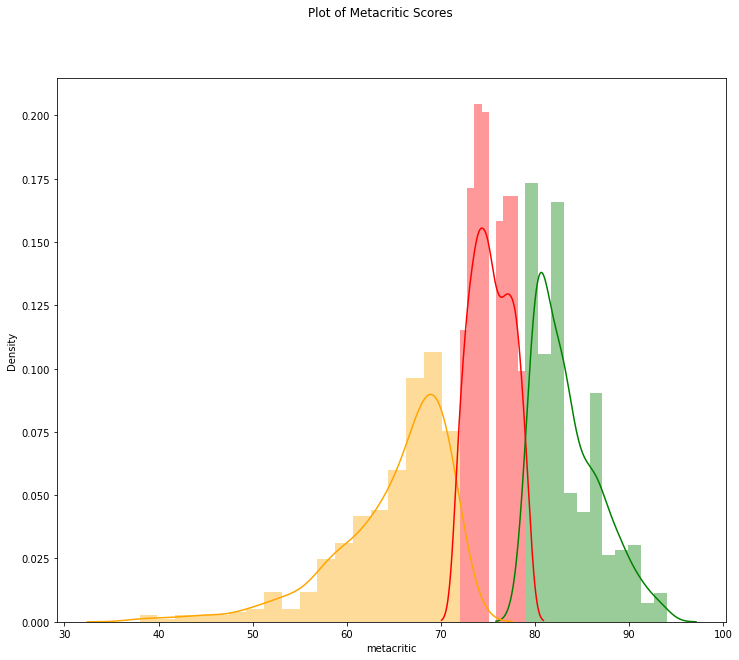

In [50]:
fig, axs = plt.subplots(1, 1, figsize = [12,10], sharex = True, sharey = True)
fig.suptitle('Plot of Metacritic Scores')
sns.distplot(steam_t['metacritic'], color = 'green')
sns.distplot(steam_b['metacritic'], color = 'orange')
sns.distplot(steam_m['metacritic'], color = 'red')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

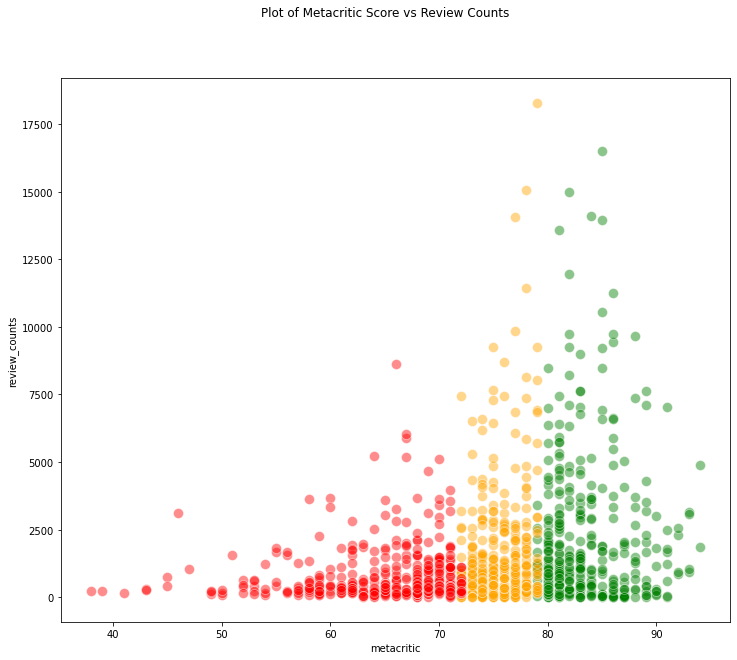

In [29]:
fig, axs = plt.subplots(1, 1, figsize = [12,10], sharex = True, sharey = True)
fig.suptitle('Plot of Metacritic Score vs Review Counts')
sns.scatterplot(x = 'metacritic',  y = 'review_counts', data =steam_t , s = 100 , alpha = 0.45, color = 'green')
sns.scatterplot(x = 'metacritic', y = 'review_counts', data = steam_m, s = 100, alpha = 0.45, color = 'orange')
sns.scatterplot(x = 'metacritic', y = 'review_counts', data = steam_b, s= 100, alpha = 0.45, color = 'red')
plt.show

In [30]:
# clean text for NLP
# drop rows where there are no reviews.
for df in steam_team:
    df['reviews'].dropna()
    for x in df['reviews']:
        if x == []:
            df.drop(df['reviews'].loc[x], axis = 0, inplace = True)



C:\Users\Ish\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


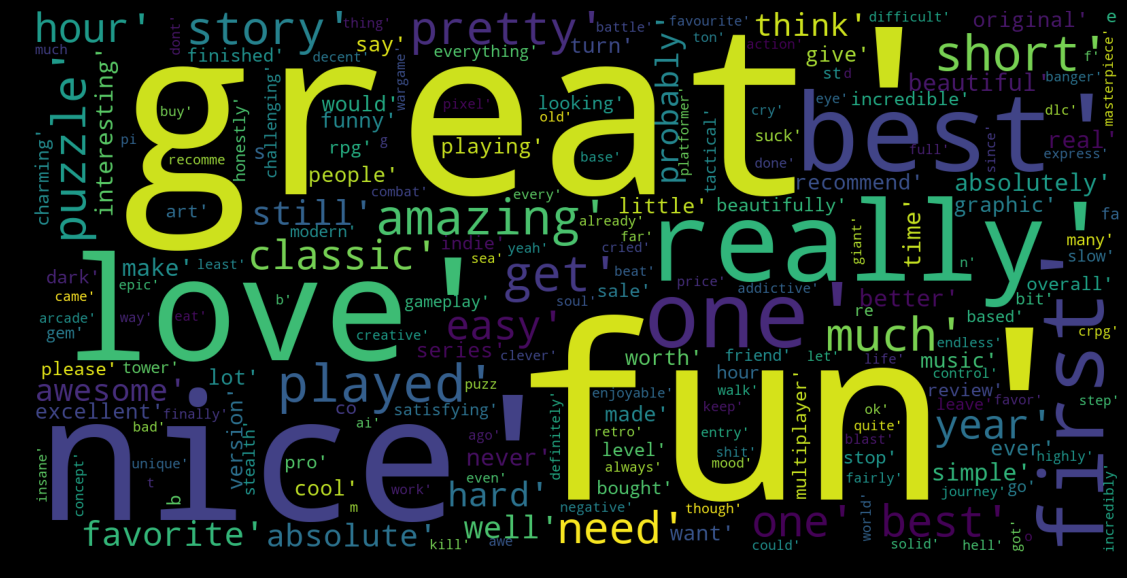

In [54]:
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud_top200 = WordCloud(background_color = 'black', width=1600,height=800).generate(''.join(str(steam_t['frequency distributions'])))
plt.figure(figsize = (20,10), facecolor = 'k')
plt.imshow(wordcloud_top200)

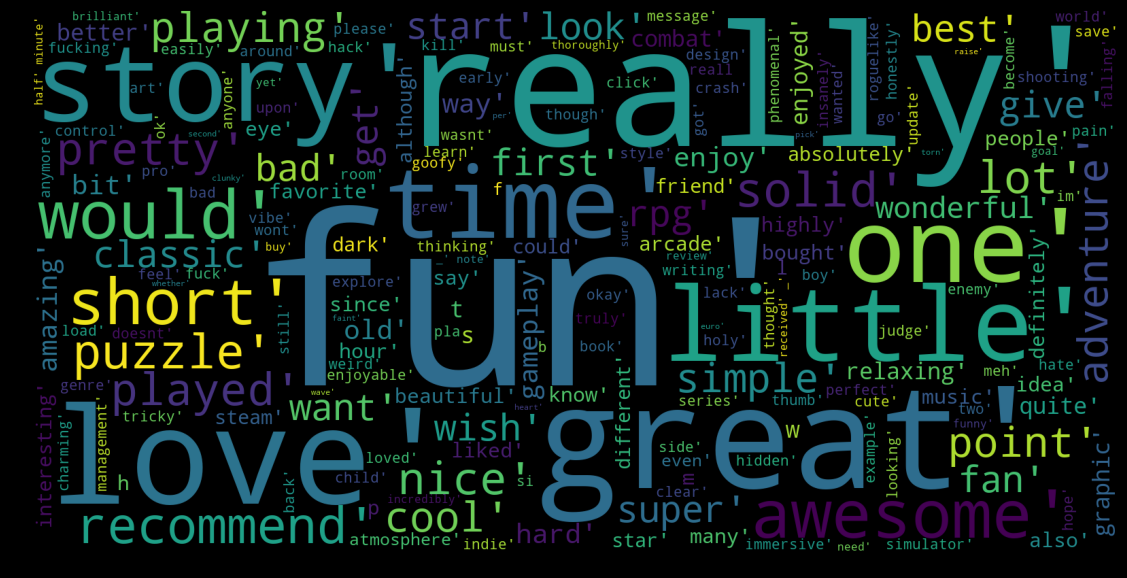

In [55]:
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud_top200 = WordCloud(background_color = 'black', width=1600,height=800).generate(''.join(str(steam_m['frequency distributions'])))
plt.figure(figsize = (20,10), facecolor = 'k')
plt.imshow(wordcloud_top200)

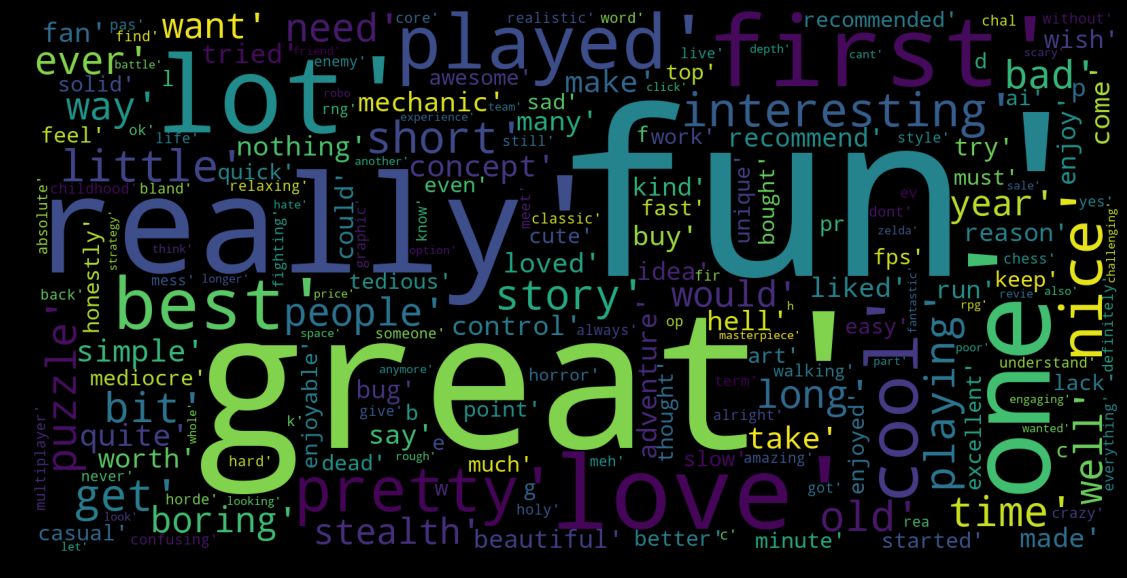

In [56]:
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud_top200 = WordCloud(background_color = 'black', width=1600,height=800).generate(''.join(str(steam_b['frequency distributions'])))
plt.figure(figsize = (20,10), facecolor = 'k')
plt.imshow(wordcloud_top200)

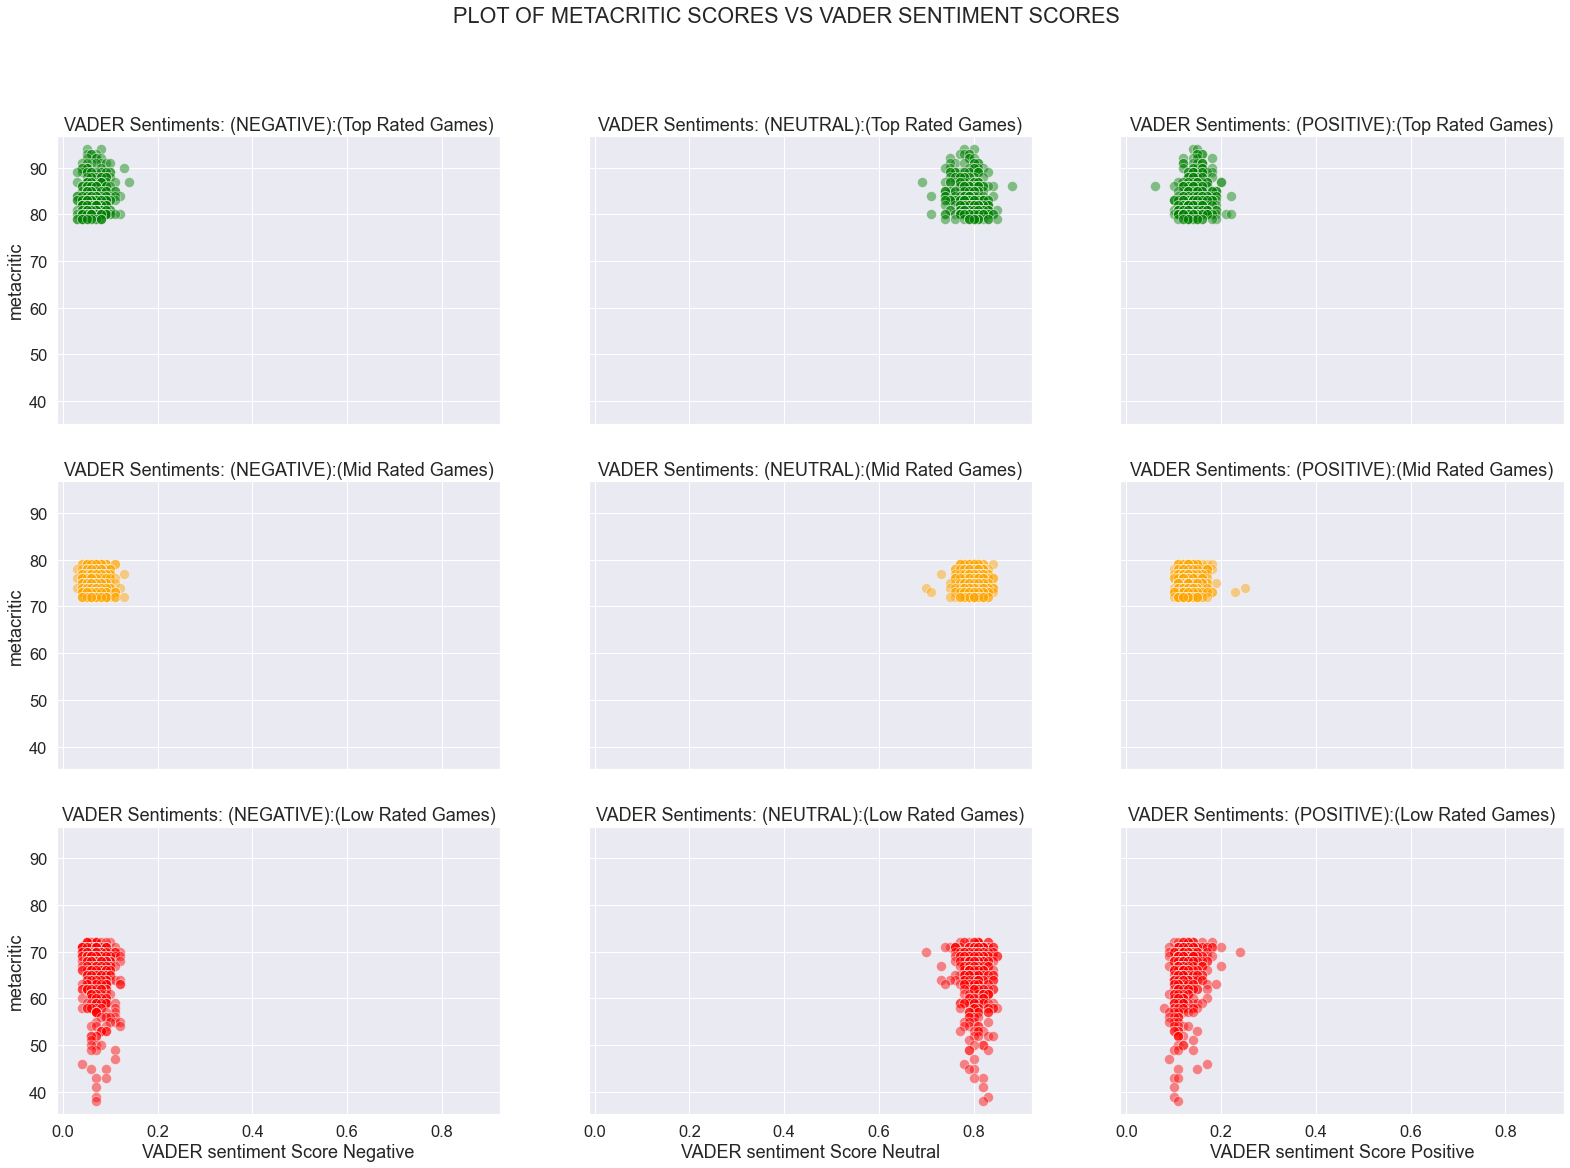

In [67]:
# plot metacritic scores against VADER sentiment scores.
sns.set(font_scale = 1.5)
fig, axs = plt.subplots(3,3, figsize = [27,18], sharex = True, sharey = True)
fig.suptitle('PLOT OF METACRITIC SCORES VS VADER SENTIMENT SCORES')

sns.scatterplot(y= 'metacritic', x = 'VADER sentiment Score Negative', data =steam_t, alpha = 0.45, s = 100, ax = axs[0,0], color = 'green')
axs[0,0].set_title('VADER Sentiments: (NEGATIVE):(Top Rated Games)')

sns.scatterplot(y = 'metacritic', x = 'VADER sentiment Score Neutral', data = steam_t, alpha = 0.45, s = 100,ax = axs[0,1], color = 'green')
axs[0,1].set_title('VADER Sentiments: (NEUTRAL):(Top Rated Games)')

sns.scatterplot(y = 'metacritic', x = 'VADER sentiment Score Positive', data = steam_t, alpha = 0.45, s = 100,ax = axs[0,2], color = 'green')
axs[0,2].set_title('VADER Sentiments: (POSITIVE):(Top Rated Games)')
 
sns.scatterplot(y= 'metacritic', x = 'VADER sentiment Score Negative', data = steam_m, alpha = 0.45, s = 100,ax = axs[1,0], color = 'orange')
axs[1,0].set_title('VADER Sentiments: (NEGATIVE):(Mid Rated Games)')

sns.scatterplot(y = 'metacritic', x = 'VADER sentiment Score Neutral', data = steam_m, alpha = 0.45, s = 100,ax = axs[1,1], color = 'orange')
axs[1,1].set_title('VADER Sentiments: (NEUTRAL):(Mid Rated Games)')

sns.scatterplot(y = 'metacritic', x = 'VADER sentiment Score Positive', data = steam_m, alpha = 0.45, s = 100,ax = axs[1,2], color = 'orange')
axs[1,2].set_title('VADER Sentiments: (POSITIVE):(Mid Rated Games)')

sns.scatterplot(y= 'metacritic', x = 'VADER sentiment Score Negative', data = steam_b, alpha = 0.45, s = 100,ax = axs[2,0], color = 'red')
axs[2,0].set_title('VADER Sentiments: (NEGATIVE):(Low Rated Games)')

sns.scatterplot(y = 'metacritic', x = 'VADER sentiment Score Neutral', data = steam_b, alpha = 0.45, s = 100,ax = axs[2,1], color = 'red')
axs[2,1].set_title('VADER Sentiments: (NEUTRAL):(Low Rated Games)' )

sns.scatterplot(y = 'metacritic', x = 'VADER sentiment Score Positive', data = steam_b, alpha = 0.45, s = 100,ax = axs[2,2], color = 'red')
axs[2,2].set_title('VADER Sentiments: (POSITIVE):(Low Rated Games)')

plt.show()

In [78]:
#Create a dataframe of the review lengths to sentiments

def len2sent_frame(pd_df):
    sentiment_lengths = pd_df[['metacritic','review_lengths_sentiments']]
    lengths_to_sentiments = pd.DataFrame.from_dict(sentiment_lengths['review_lengths_sentiments'])

    keys = []   
    for x in lengths_to_sentiments['review_lengths_sentiments']:
        keys.append(x.keys())
    values = []
    for key in keys:
        for k in key:
            for x in lengths_to_sentiments['review_lengths_sentiments']:
                try:
                    values.append(x[k])
                except:
                    pass
    length = []
    vader_scores = []
    for x in values:
        length.append(x[1])
        vader_scores.append(x[2])

    lengths_to_values = dict(zip(length, vader_scores))
    lengths_to_values

    len_to_sents = pd.DataFrame.from_dict(lengths_to_values).transpose().reset_index()
    len_to_sents.columns =  ['Review length /words', 'VADER sentiment Score Negative','VADER sentiment Score Neutral','VADER sentiment Score Positive']
    return len_to_sents

len_sent_top_200 = len2sent_frame(steam_t)
#len_sent_top_200

len_sent_mid_200 = len2sent_frame(steam_m)
#len_sent_mid_200

len_sent_bottom_200 = len2sent_frame(steam_b)
#len_sent_bottom_200

review_length_to_sentiment = pd.concat([len_sent_top_200, len_sent_mid_200, len_sent_bottom_200], axis = 0)
review_length_to_sentiment.to_excel('review_length_to_sentiment_steam.xls')

C:\Users\Ish\AppData\Local\Temp/ipykernel_17900/507157147.py:41: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  review_length_to_sentiment.to_excel('review_length_to_sentiment_steam.xls')


In [57]:
# pickle cleaned and processed data
with open('steam_top_380_clean.p', 'wb') as f:
    pickle.dump(steam_t, f)

with open('steam_mid_380_clean.p', 'wb') as f:
    pickle.dump(steam_m, f)

with open('steam_bottom_380_clean.p', 'wb') as f:
    pickle.dump(steam_b, f)


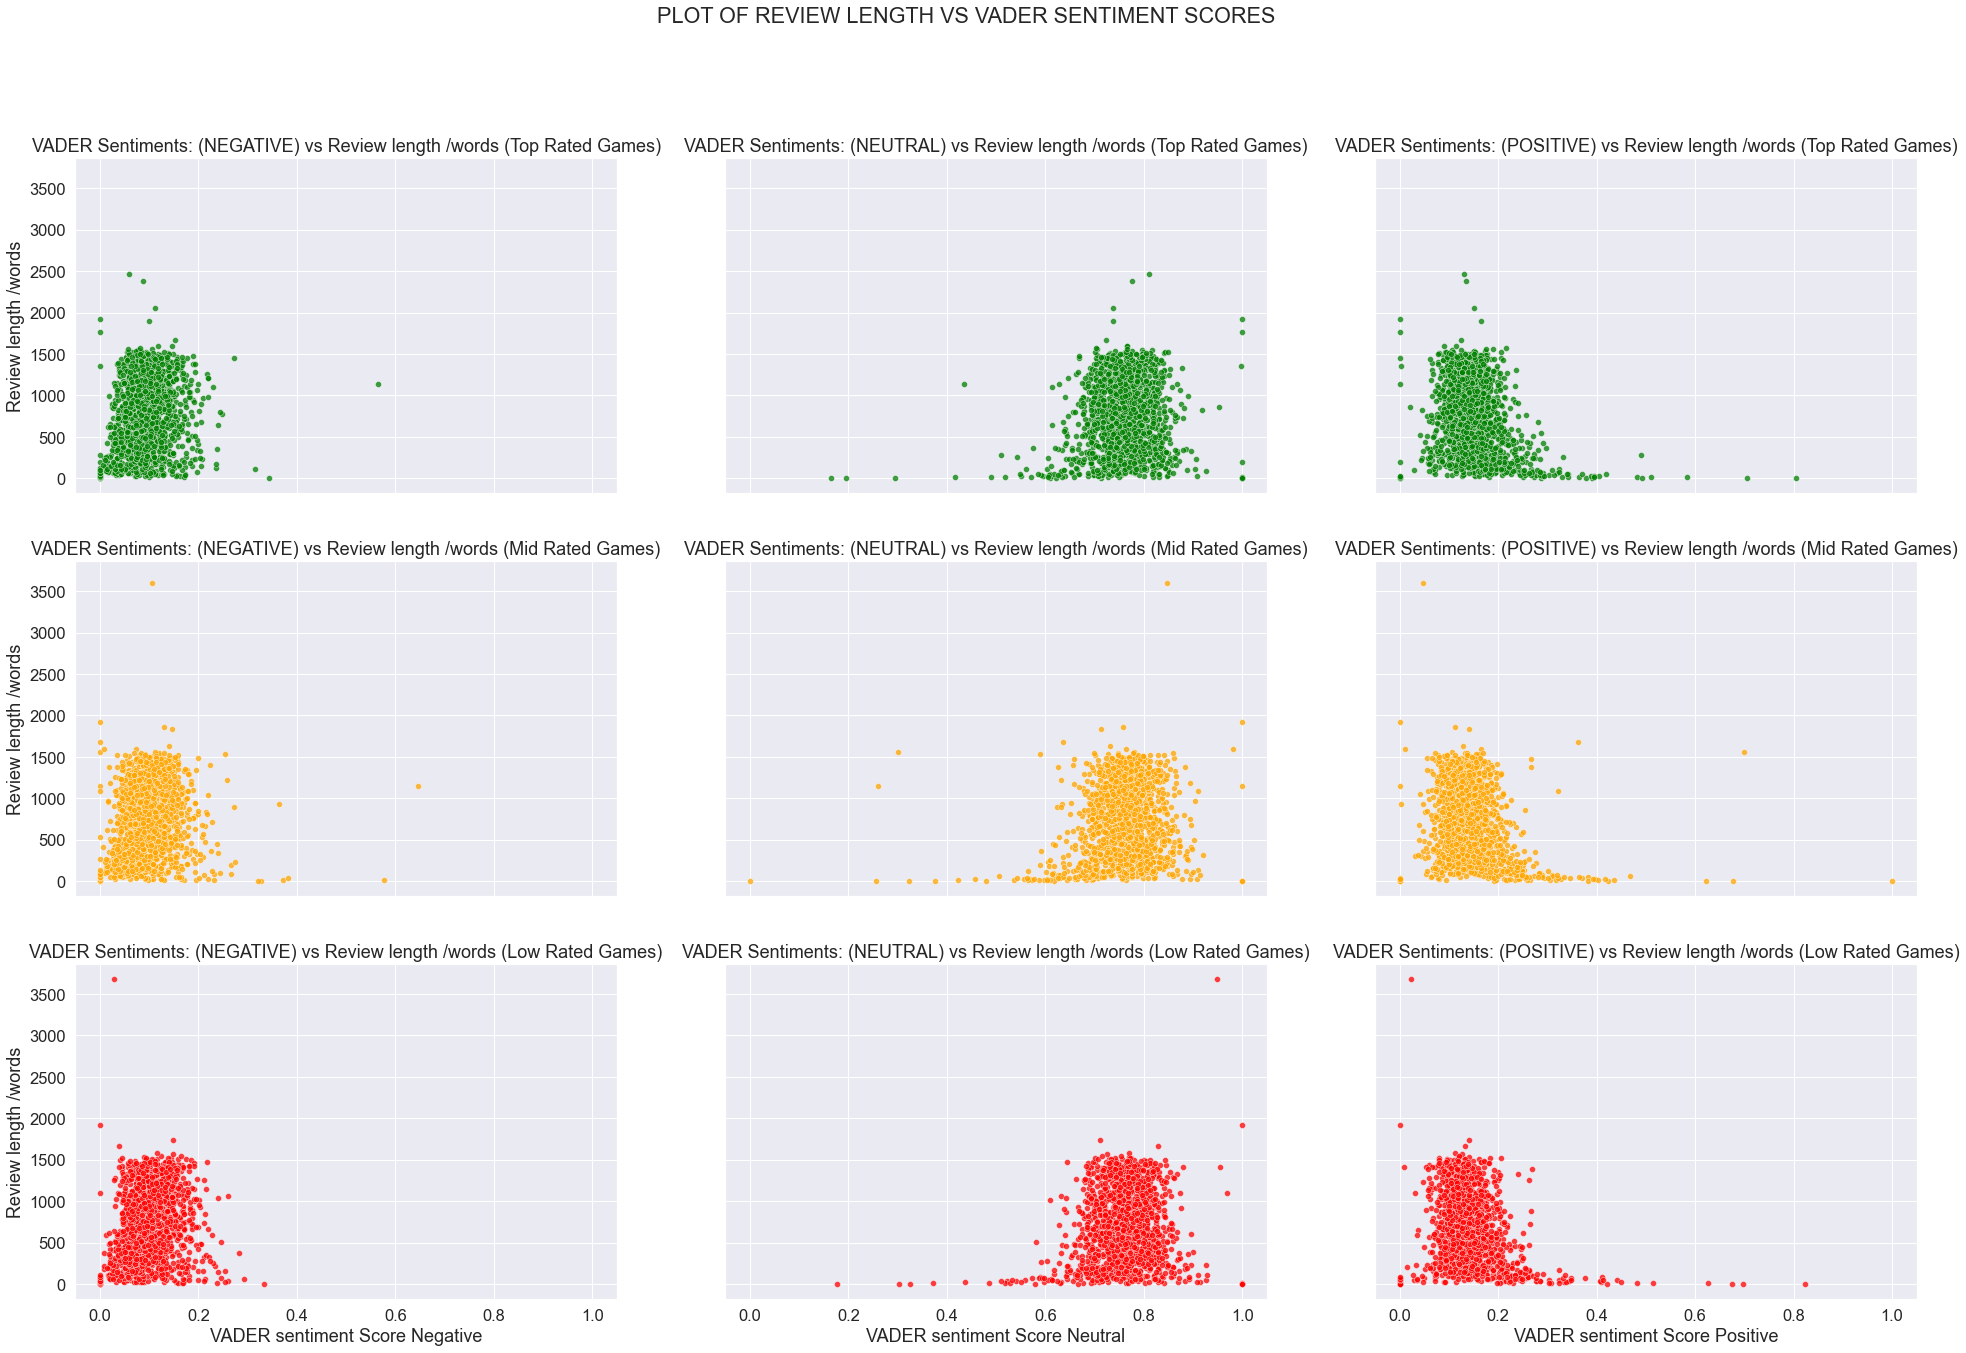

In [75]:
# Plot the lengths of reviews against the respective VADER Sentiment scores for each group of reviews.
sns.set(font_scale = 1.5)
fig, axs = plt.subplots(3,3, figsize = [33,21], sharex = True, sharey = True)
fig.suptitle('PLOT OF REVIEW LENGTH VS VADER SENTIMENT SCORES')

sns.scatterplot(y= 'Review length /words', x = 'VADER sentiment Score Negative', data = len_sent_top_200, alpha = 0.75, ax = axs[0,0], color = 'green')
axs[0,0].set_title('VADER Sentiments: (NEGATIVE) vs Review length /words (Top Rated Games)')

sns.scatterplot(y = 'Review length /words', x = 'VADER sentiment Score Neutral', data = len_sent_top_200, alpha = 0.75,ax = axs[0,1], color = 'green')
axs[0,1].set_title('VADER Sentiments: (NEUTRAL) vs Review length /words (Top Rated Games)')

sns.scatterplot(y = 'Review length /words', x = 'VADER sentiment Score Positive', data = len_sent_top_200, alpha = 0.75,ax = axs[0,2], color = 'green')
axs[0,2].set_title('VADER Sentiments: (POSITIVE) vs Review length /words (Top Rated Games)')

sns.scatterplot(y= 'Review length /words', x = 'VADER sentiment Score Negative', data = len_sent_mid_200, alpha = 0.75,ax = axs[1,0], color = 'orange')
axs[1,0].set_title('VADER Sentiments: (NEGATIVE) vs Review length /words (Mid Rated Games)')

sns.scatterplot(y = 'Review length /words', x = 'VADER sentiment Score Neutral', data = len_sent_mid_200, alpha = 0.75,ax = axs[1,1], color = 'orange')
axs[1,1].set_title('VADER Sentiments: (NEUTRAL) vs Review length /words (Mid Rated Games)')

sns.scatterplot(y = 'Review length /words', x = 'VADER sentiment Score Positive', data = len_sent_mid_200, alpha = 0.75,ax = axs[1,2], color = 'orange')
axs[1,2].set_title('VADER Sentiments: (POSITIVE) vs Review length /words (Mid Rated Games)')

sns.scatterplot(y= 'Review length /words', x = 'VADER sentiment Score Negative', data = len_sent_bottom_200, alpha = 0.75,ax = axs[2,0], color = 'red')
axs[2,0].set_title('VADER Sentiments: (NEGATIVE) vs Review length /words (Low Rated Games)')

sns.scatterplot(y = 'Review length /words', x = 'VADER sentiment Score Neutral', data = len_sent_bottom_200, alpha = 0.75,ax = axs[2,1], color = 'red')
axs[2,1].set_title('VADER Sentiments: (NEUTRAL) vs Review length /words (Low Rated Games)' )

sns.scatterplot(y = 'Review length /words', x = 'VADER sentiment Score Positive', data = len_sent_bottom_200, alpha = 0.75,ax = axs[2,2], color = 'red')
axs[2,2].set_title('VADER Sentiments: (POSITIVE) vs Review length /words (Low Rated Games)')

plt.show()

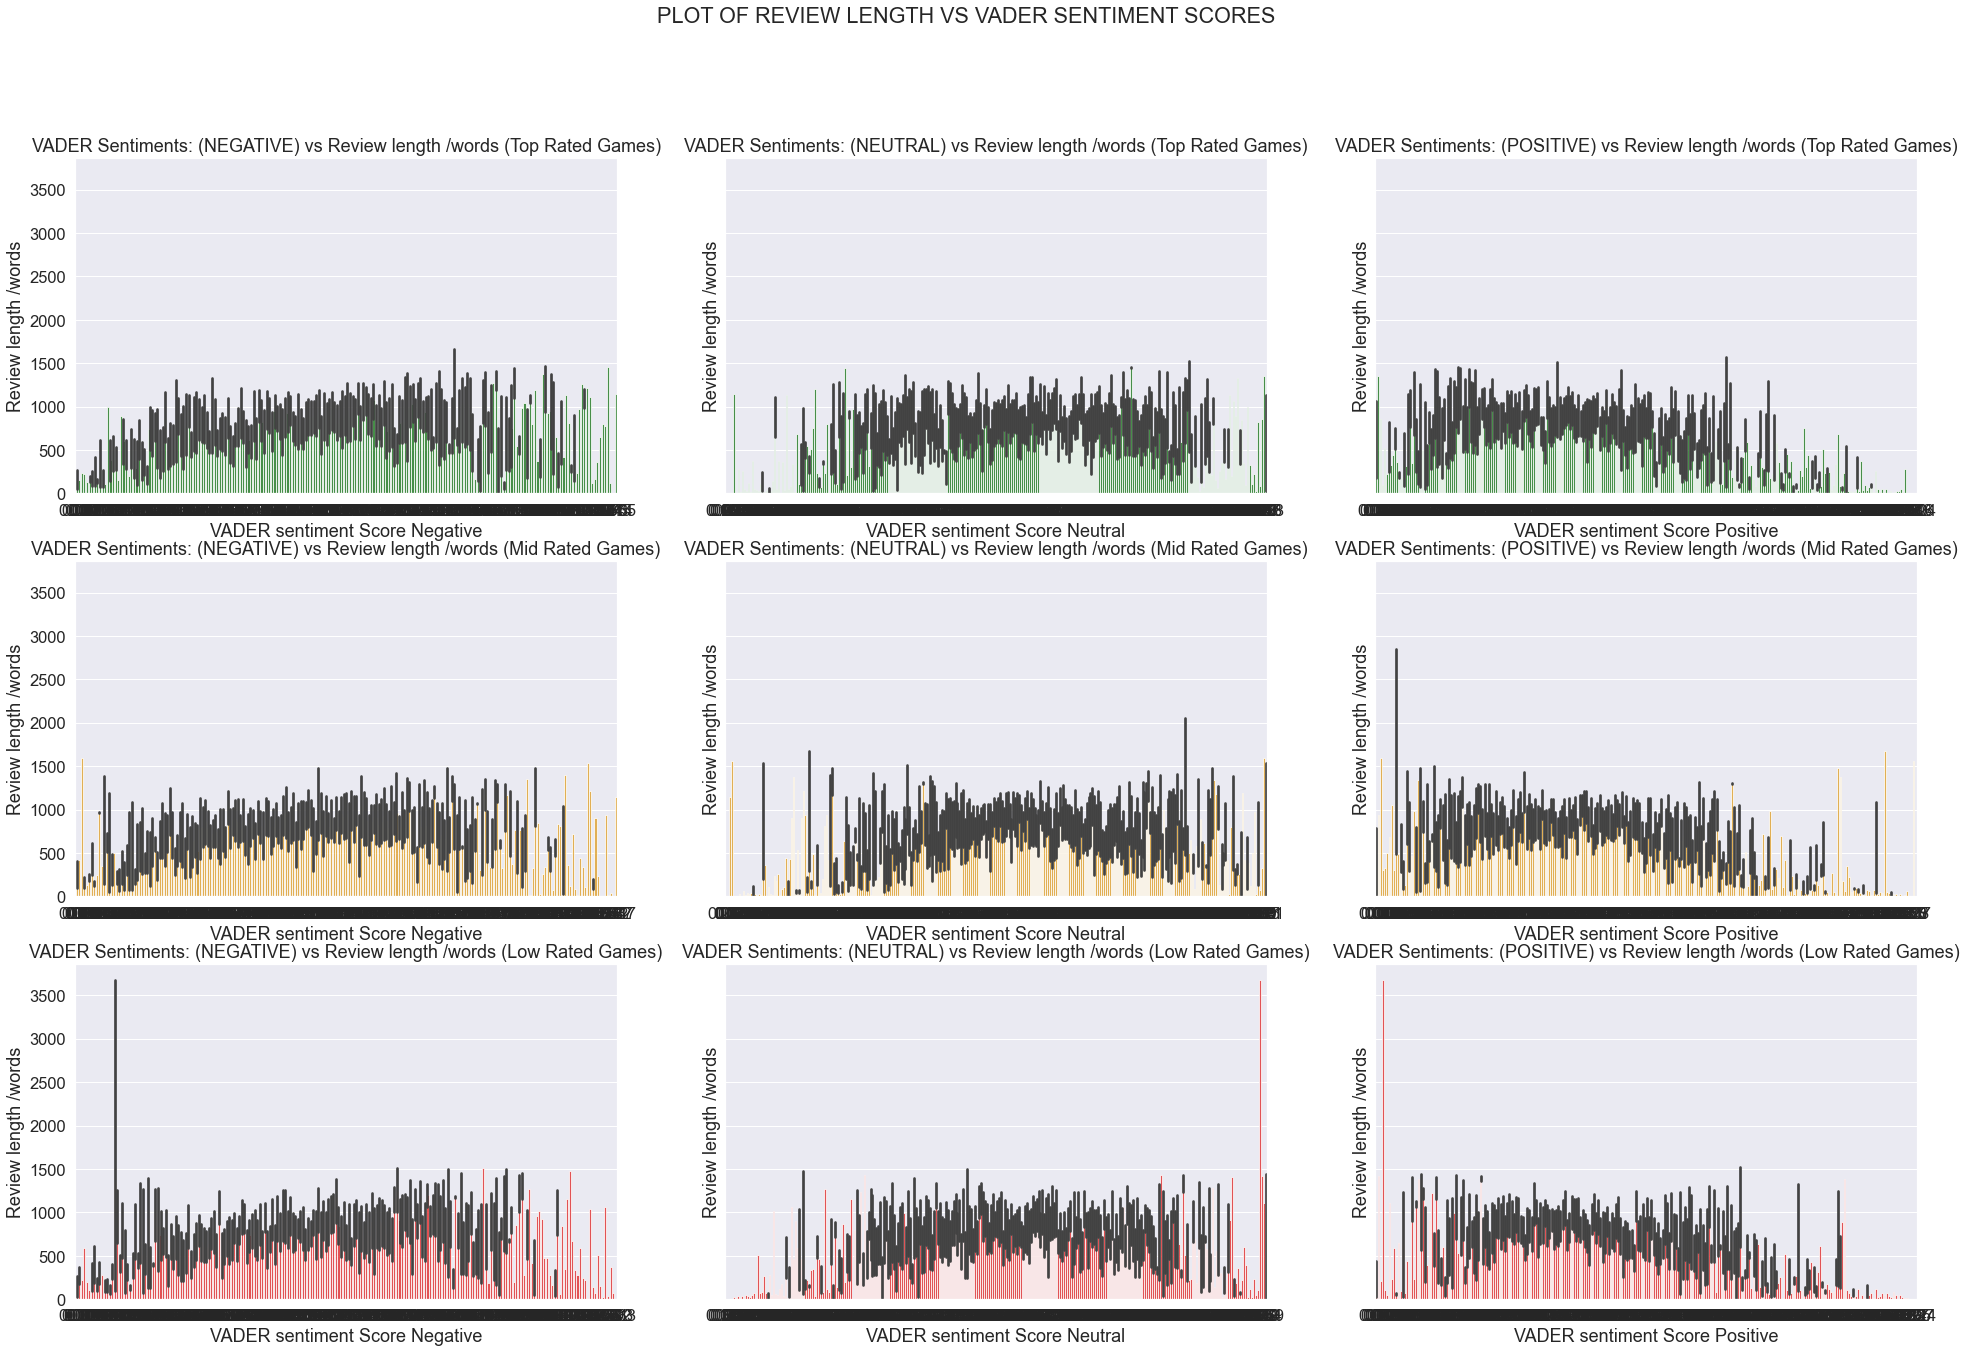

In [81]:
# Plot the lengths of reviews against the respective VADER Sentiment scores for each group of reviews.
sns.set(font_scale = 1.5)
fig, axs = plt.subplots(3,3, figsize = [33,21], sharex = False, sharey = True)
fig.suptitle('PLOT OF REVIEW LENGTH VS VADER SENTIMENT SCORES')

sns.barplot(y= 'Review length /words', x = 'VADER sentiment Score Negative', data = len_sent_top_200, alpha = 0.75, ax = axs[0,0], color = 'green')
axs[0,0].set_title('VADER Sentiments: (NEGATIVE) vs Review length /words (Top Rated Games)')

sns.barplot(y = 'Review length /words', x = 'VADER sentiment Score Neutral', data = len_sent_top_200, alpha = 0.75,ax = axs[0,1], color = 'green')
axs[0,1].set_title('VADER Sentiments: (NEUTRAL) vs Review length /words (Top Rated Games)')

sns.barplot(y = 'Review length /words', x = 'VADER sentiment Score Positive', data = len_sent_top_200, alpha = 0.75,ax = axs[0,2], color = 'green')
axs[0,2].set_title('VADER Sentiments: (POSITIVE) vs Review length /words (Top Rated Games)')

sns.barplot(y= 'Review length /words', x = 'VADER sentiment Score Negative', data = len_sent_mid_200, alpha = 0.75,ax = axs[1,0], color = 'orange')
axs[1,0].set_title('VADER Sentiments: (NEGATIVE) vs Review length /words (Mid Rated Games)')

sns.barplot(y = 'Review length /words', x = 'VADER sentiment Score Neutral', data = len_sent_mid_200, alpha = 0.75,ax = axs[1,1], color = 'orange')
axs[1,1].set_title('VADER Sentiments: (NEUTRAL) vs Review length /words (Mid Rated Games)')

sns.barplot(y = 'Review length /words', x = 'VADER sentiment Score Positive', data = len_sent_mid_200, alpha = 0.75,ax = axs[1,2], color = 'orange')
axs[1,2].set_title('VADER Sentiments: (POSITIVE) vs Review length /words (Mid Rated Games)')

sns.barplot(y= 'Review length /words', x = 'VADER sentiment Score Negative', data = len_sent_bottom_200, alpha = 0.75,ax = axs[2,0], color = 'red')
axs[2,0].set_title('VADER Sentiments: (NEGATIVE) vs Review length /words (Low Rated Games)')

sns.barplot(y = 'Review length /words', x = 'VADER sentiment Score Neutral', data = len_sent_bottom_200, alpha = 0.75,ax = axs[2,1], color = 'red')
axs[2,1].set_title('VADER Sentiments: (NEUTRAL) vs Review length /words (Low Rated Games)' )

sns.barplot(y = 'Review length /words', x = 'VADER sentiment Score Positive', data = len_sent_bottom_200, alpha = 0.75,ax = axs[2,2], color = 'red')
axs[2,2].set_title('VADER Sentiments: (POSITIVE) vs Review length /words (Low Rated Games)')

plt.show()